# Series

Series' data can be many different things:

- a Python dict
- an `ndarray`
- a scalar value (like 2020)

A Pandas Series is like a column in a table: it is a one-dimensional array holding data of any type.

So, in essence
- **Series is a one-dimensional labeled array** capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). 
- The **axis labels** are collectively referred to as the index. 



![images/01_table_series.svg](images/01_table_series.svg)


To create a series:

```s = pd.Series(data, index=index)```

More simply, the basic method to create a `Series` is to call:

In [1]:
# sets the backend of matplotlib to the 'inline' backend:
# With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell  
# that produced it. The resulting plots will then also be stored in the notebook document.
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
s = pd.Series(dtype='float')
s

Series([], dtype: float64)

## Make a Serie
### From ` ndarray `
- If data is an `ndarray`, index must be the same length as data. 
- If no index is passed, one will be created having values [0, ..., len(data) - 1].

In [3]:
v = np.random.normal(size=5)
type(v)

numpy.ndarray

In [4]:
s = pd.Series(v, index=tuple('abcde'))
s

a   -1.849663
b   -0.269534
c    0.303325
d    0.322865
e    0.297836
dtype: float64

The index is given by

In [5]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

The np.array of values is given by 

In [6]:
s.values

array([-1.84966302, -0.26953417,  0.3033248 ,  0.32286476,  0.29783612])

And, **values can be accessed by label index**

In [7]:
s.a

-1.8496630216270937

In [8]:
s['a']

-1.8496630216270937

In [9]:
s.loc['a']

-1.8496630216270937

or 0-based index (be careful!)

In [10]:
s.iloc[0]

-1.8496630216270937

In [11]:
s[0]

-1.8496630216270937

It is also possible to do **slicing** (We'll see more of it latter)

In [12]:
s['b':'d']

b   -0.269534
c    0.303325
d    0.322865
dtype: float64

### From dict

Series can be instantiated from dictionaries.

When the data is a dict, and an index is not passed, the Series index will be ordered by the dict’s insertion order (Python >= 3.6 and Pandas >= 0.23).

In [13]:
d = {k: v for k, v in zip('abcde', np.random.normal(size=5))}
d

{'a': -0.6547087720918381,
 'b': -1.6294670489136887,
 'c': -0.605246958043454,
 'd': -1.517368389048015,
 'e': 1.444485675716631}

In [14]:
s = pd.Series(d)
s

a   -0.654709
b   -1.629467
c   -0.605247
d   -1.517368
e    1.444486
dtype: float64

### From Scalar

If data is a scalar value, an index must be provided. The value will be repeated to match the length of index.

In [15]:
s = pd.Series(1.0, index=tuple('olivia'))
s

o    1.0
l    1.0
i    1.0
v    1.0
i    1.0
a    1.0
dtype: float64

But be careful, indexes are not necessarily unique. 

In [16]:
s['i']

i    1.0
i    1.0
dtype: float64

- when index is unique, pandas use a hashtable to map key to value: O(1)
- when index is non-unique and sorted, pandas use binary search: O(logN)
- when index is random ordered pandas need to check all the keys in the index: O(N)

Let us then check the access time for these cases:

In [17]:
idx_unique = 'defghabcijkqrstuvwlmnopxyz'

print('index length', len(idx_unique), ' (unique: ', len(set(idx_unique)), ')')

s = pd.Series(1.0, index=tuple(idx_unique))

print("unique & unsorted")
%timeit s['z']

print("unique & sorted")
s.sort_index(inplace=True)
%timeit s['z']

index length 26  (unique:  26 )
unique & unsorted
1.46 µs ± 29.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
unique & sorted
1.46 µs ± 19.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [18]:
idx_not_unique = "oliviaoliviaoliviaoliviaol"
print('index length', len(idx_not_unique), ' (unique: ', len(set(idx_not_unique)), ')')

s = pd.Series(1.0, index=tuple(idx_not_unique))

print("not unique & unsorted")
%timeit s['a']

print("not unique & sorted")
s.sort_index(inplace=True)
%timeit s['a']

index length 26  (unique:  5 )
not unique & unsorted
29.8 µs ± 1.18 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
not unique & sorted
16.8 µs ± 32.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## NaN
`NaN` (*not a number*) is the standard missing data marker used in pandas.


In [19]:
d = {'a' : 1, 'b' : 2, 'c': 3}

pd.Series(d, index=tuple('abz'))

a    1.0
b    2.0
z    NaN
dtype: float64

## Get series values
The type of the values can be obtained via `dtype`

In [20]:
s

a    1.0
a    1.0
a    1.0
a    1.0
i    1.0
i    1.0
i    1.0
i    1.0
i    1.0
i    1.0
i    1.0
i    1.0
l    1.0
l    1.0
l    1.0
l    1.0
l    1.0
o    1.0
o    1.0
o    1.0
o    1.0
o    1.0
v    1.0
v    1.0
v    1.0
v    1.0
dtype: float64

In [21]:
# as of pandas 0.24.0, the default dtype is 'float64'
s.dtype

dtype('float64')

And the values themselve

In [22]:
# array of values as a numpy array 
print(type(s.values))
s.values

<class 'numpy.ndarray'>


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [23]:
# as a PandasArray
print(type(s.array))
s.array

<class 'pandas.core.arrays.numpy_.PandasArray'>


<PandasArray>
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Length: 26, dtype: float64

In [24]:
# also as a numpy array
print(type(s.array))
s.to_numpy()

<class 'pandas.core.arrays.numpy_.PandasArray'>


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

## Slicing
Series acts very similarly to a ndarray, and is a valid argument to most NumPy functions. 
However, operations such as slicing will also slice the index.

In [25]:
s = pd.Series(np.random.normal(size=5), index=tuple('abcde'))
s

a    0.176440
b   -1.097840
c   -0.304180
d   -1.023922
e   -0.364008
dtype: float64

Get the indeces that satisfy some filter

In [26]:
s>0

a     True
b    False
c    False
d    False
e    False
dtype: bool

Given the filter, you can get the values

In [27]:
s[s>0]

a    0.17644
dtype: float64

Another example

In [28]:
s[s>s.median()]

a    0.17644
c   -0.30418
dtype: float64

To get values given the indeces (using the 0-based indexing, I always prefer to use `iloc` to avoid any confusion)

In [29]:
s.iloc[[0, 1, 2]]

a    0.17644
b   -1.09784
c   -0.30418
dtype: float64

In [30]:
s[['a', 'c', 'e']]

a    0.176440
c   -0.304180
e   -0.364008
dtype: float64

To change the series' values you can use the same indexing access

In [31]:
s["a"] = 10
s

a    10.000000
b    -1.097840
c    -0.304180
d    -1.023922
e    -0.364008
dtype: float64

In [32]:
s.loc["b"] = 20
s

a    10.000000
b    20.000000
c    -0.304180
d    -1.023922
e    -0.364008
dtype: float64

In [33]:
s.iloc[2:] = 30
s

a    10.0
b    20.0
c    30.0
d    30.0
e    30.0
dtype: float64

In [34]:
s.iloc[-1] = 40
s

a    10.0
b    20.0
c    30.0
d    30.0
e    40.0
dtype: float64

## Exercise
Before running them, try to guess the output of the followiong lines 

In [35]:
s1 = pd.Series(np.random.randn(10), index=list(range(0, 50, 5)))
s1

0     0.387192
5     1.597901
10   -2.520249
15    0.512114
20   -0.286094
25   -0.135176
30    0.770350
35    0.388736
40   -0.243896
45   -0.894259
dtype: float64

In [36]:
s1[5]

1.5979010710242143

In [37]:
s1.loc[5]

1.5979010710242143

In [38]:
s1.loc[:5]

0    0.387192
5    1.597901
dtype: float64

In [39]:
# !
s1[:5]

0     0.387192
5     1.597901
10   -2.520249
15    0.512114
20   -0.286094
dtype: float64

In [40]:
s1.iloc[:5]

0     0.387192
5     1.597901
10   -2.520249
15    0.512114
20   -0.286094
dtype: float64

In [41]:
s1.iloc[5]

-0.13517589082075449

## Operations
When working with raw NumPy arrays, looping through value-by-value is usually not necessary. The same is true when working with Series in pandas. Series can also be passed into most NumPy methods expecting an ndarray.

In [42]:
r = pd.Series([1, 2, 3, 4, 5], index=tuple('abcde'))
s = pd.Series([1, 2, 3, 4, 5], index=tuple('edcba'))

In [43]:
r + s

a    6
b    6
c    6
d    6
e    6
dtype: int64

In [44]:
2 * r

a     2
b     4
c     6
d     8
e    10
dtype: int64

In [45]:
r ** 2

a     1
b     4
c     9
d    16
e    25
dtype: int64

In [46]:
2 ** r

a     2
b     4
c     8
d    16
e    32
dtype: int64

The result of an operation between unaligned Series will have the union of the indexes involved. If a label is not found in one Series or the other, the result will be marked as missing NaN. 

In [47]:
s[1:] + s [:-1]

a    NaN
b    8.0
c    6.0
d    4.0
e    NaN
dtype: float64

similar

In [48]:
s.iloc[1:] + s.iloc[:-1]

a    NaN
b    8.0
c    6.0
d    4.0
e    NaN
dtype: float64

## Describe & Visualize data

In [49]:
s = pd.Series(np.random.normal(size=10000))
s.head(10)

0    2.270124
1   -1.054917
2    1.272262
3    0.190576
4   -0.775642
5   -1.245634
6   -1.235037
7    0.407910
8   -0.688606
9   -0.456710
dtype: float64

In [50]:
s.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: None
Non-Null Count  Dtype  
--------------  -----  
10000 non-null  float64
dtypes: float64(1)
memory usage: 78.2 KB


In [51]:
s.describe()

count    10000.000000
mean         0.004216
std          0.991391
min         -4.604798
25%         -0.659941
50%         -0.002411
75%          0.676999
max          3.471964
dtype: float64

You can do several kinds of plot such as line, bar, box, etc. (see https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html)

<Axes: >

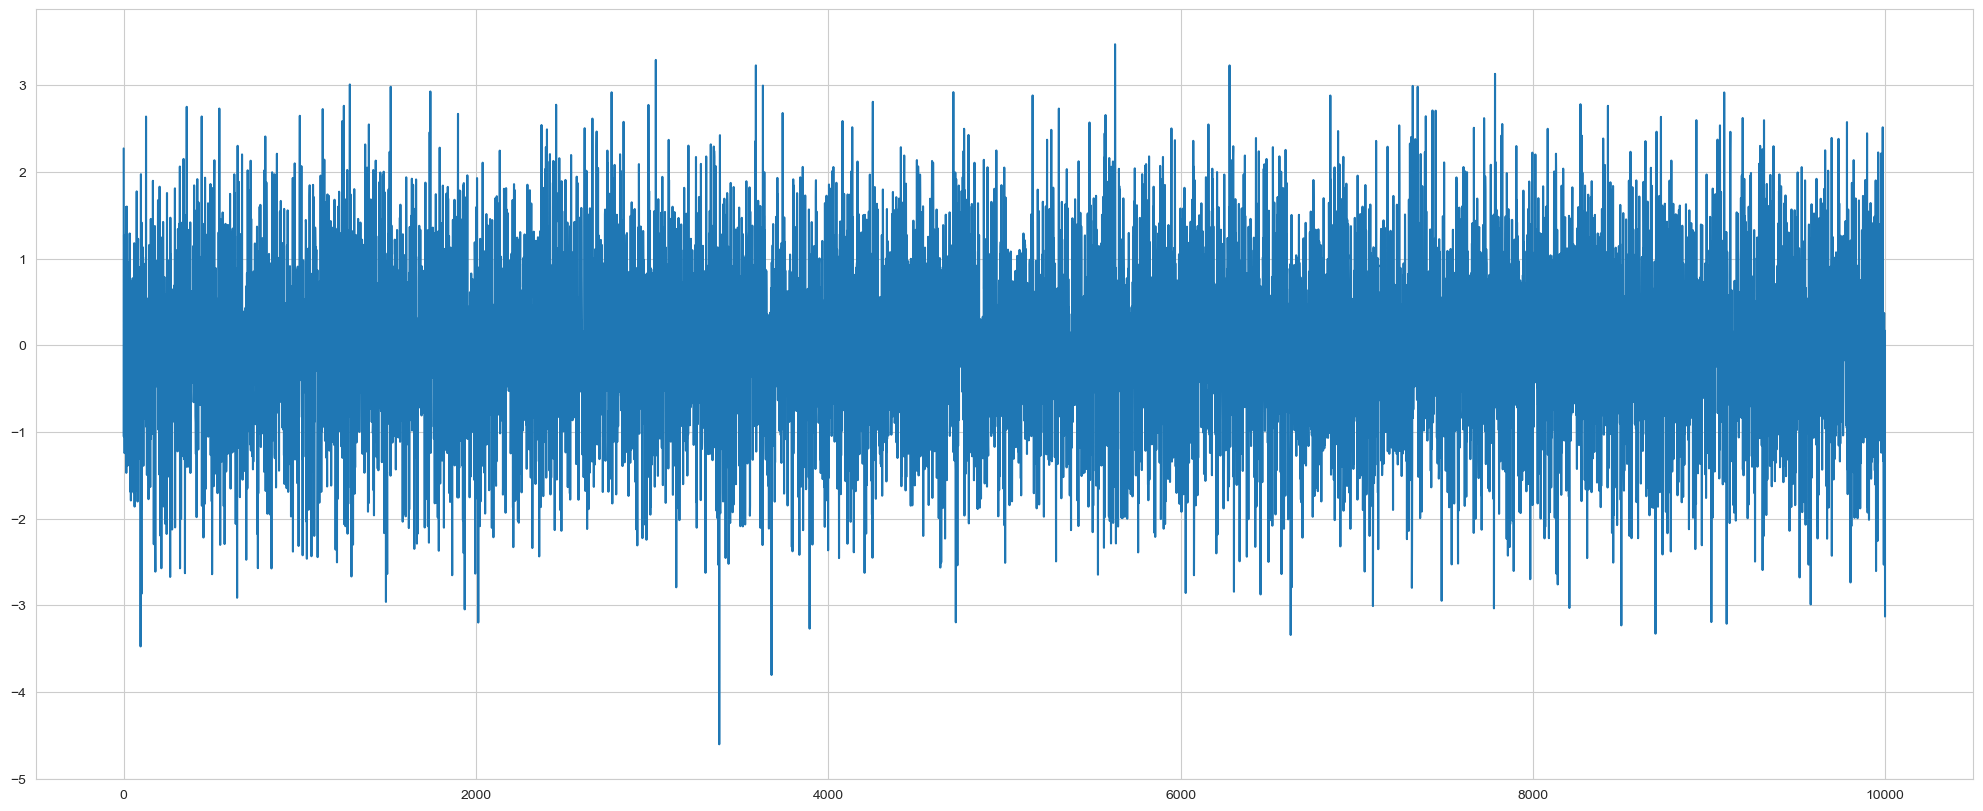

In [52]:
s.plot(figsize=(25, 10))

<Axes: >

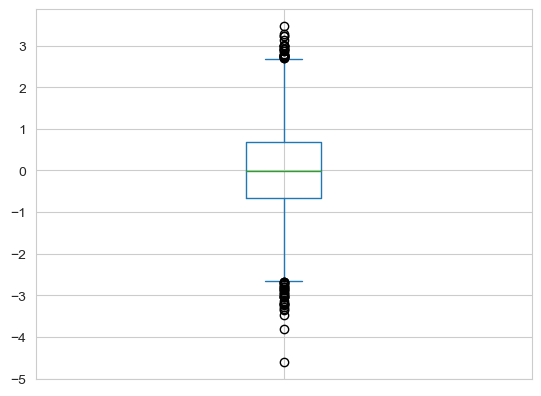

In [53]:
s.plot(kind='box')

<Axes: ylabel='Frequency'>

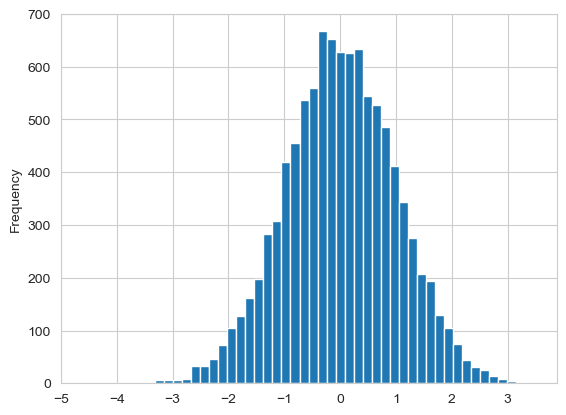

In [54]:
s.plot(kind='hist', bins=50)